Columns 

+ Date - from Jan 02, 2015 to July 29, 2024
+ Open - The price at market open
+ High - The highest price for that day
+ Low - The lowest price for that day
+ Close - The price at market close, adjusted for splits
+ Adj Close - The closing price after adjustments for all applicable splits and divident distributions
+ Volume - The number of shares traded that day

**Target variable - High**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import skew, kurtosis, boxcox
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df = pd.read_csv("berkshire_hathaway_data.csv")
print(df.shape)
print(df.columns)
print(df.head())
print(df.tail())

(2408, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
         Date        Open        High         Low       Close   Adj Close  \
0  2015-01-02  151.500000  151.600006  148.500000  149.169998  149.169998   
1  2015-01-05  148.809998  149.000000  146.779999  147.000000  147.000000   
2  2015-01-06  147.639999  148.529999  146.110001  146.839996  146.839996   
3  2015-01-07  147.940002  149.139999  147.649994  148.880005  148.880005   
4  2015-01-08  150.600006  151.369995  150.509995  151.369995  151.369995   

    Volume  
0  3436400  
1  4168800  
2  4116100  
3  4159100  
4  4282100  
            Date        Open        High         Low       Close   Adj Close  \
2403  2024-07-23  437.339996  437.920013  433.470001  434.010010  434.010010   
2404  2024-07-24  433.989990  435.410004  430.730011  432.799988  432.799988   
2405  2024-07-25  431.600006  439.630005  431.600006  433.290009  433.290009   
2406  2024-07-26  435.660004  439.000000  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2408 non-null   object 
 1   Open       2408 non-null   float64
 2   High       2408 non-null   float64
 3   Low        2408 non-null   float64
 4   Close      2408 non-null   float64
 5   Adj Close  2408 non-null   float64
 6   Volume     2408 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 131.8+ KB


In [5]:
df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]] = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2408 non-null   object 
 1   Open       2408 non-null   float64
 2   High       2408 non-null   float64
 3   Low        2408 non-null   float64
 4   Close      2408 non-null   float64
 5   Adj Close  2408 non-null   float64
 6   Volume     2408 non-null   float64
dtypes: float64(6), object(1)
memory usage: 131.8+ KB


In [7]:
df.drop(["Date"], axis = 1, inplace = True)

In [8]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  2408.000000  2408.000000  2408.000000  2408.000000  2408.000000   
mean    231.842600   233.350025   230.103335   231.791250   231.791250   
std      78.065907    78.579086    77.476308    78.063048    78.063048   
min     124.110001   125.839996   123.550003   124.129997   124.129997   
25%     169.422493   170.149994   168.237499   169.470001   169.470001   
50%     208.495003   210.125000   206.985001   208.514999   208.514999   
75%     289.497513   290.779991   287.210007   289.239990   289.239990   
max     445.619995   449.250000   439.570007   445.609985   445.609985   

             Volume  
count  2.408000e+03  
mean   4.142750e+06  
std    1.930693e+06  
min    6.720000e+04  
25%    2.987100e+06  
50%    3.654650e+06  
75%    4.684800e+06  
max    2.229380e+07  


In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
assert pd.notnull(df).all().all()
assert (df >= 0).all().all()

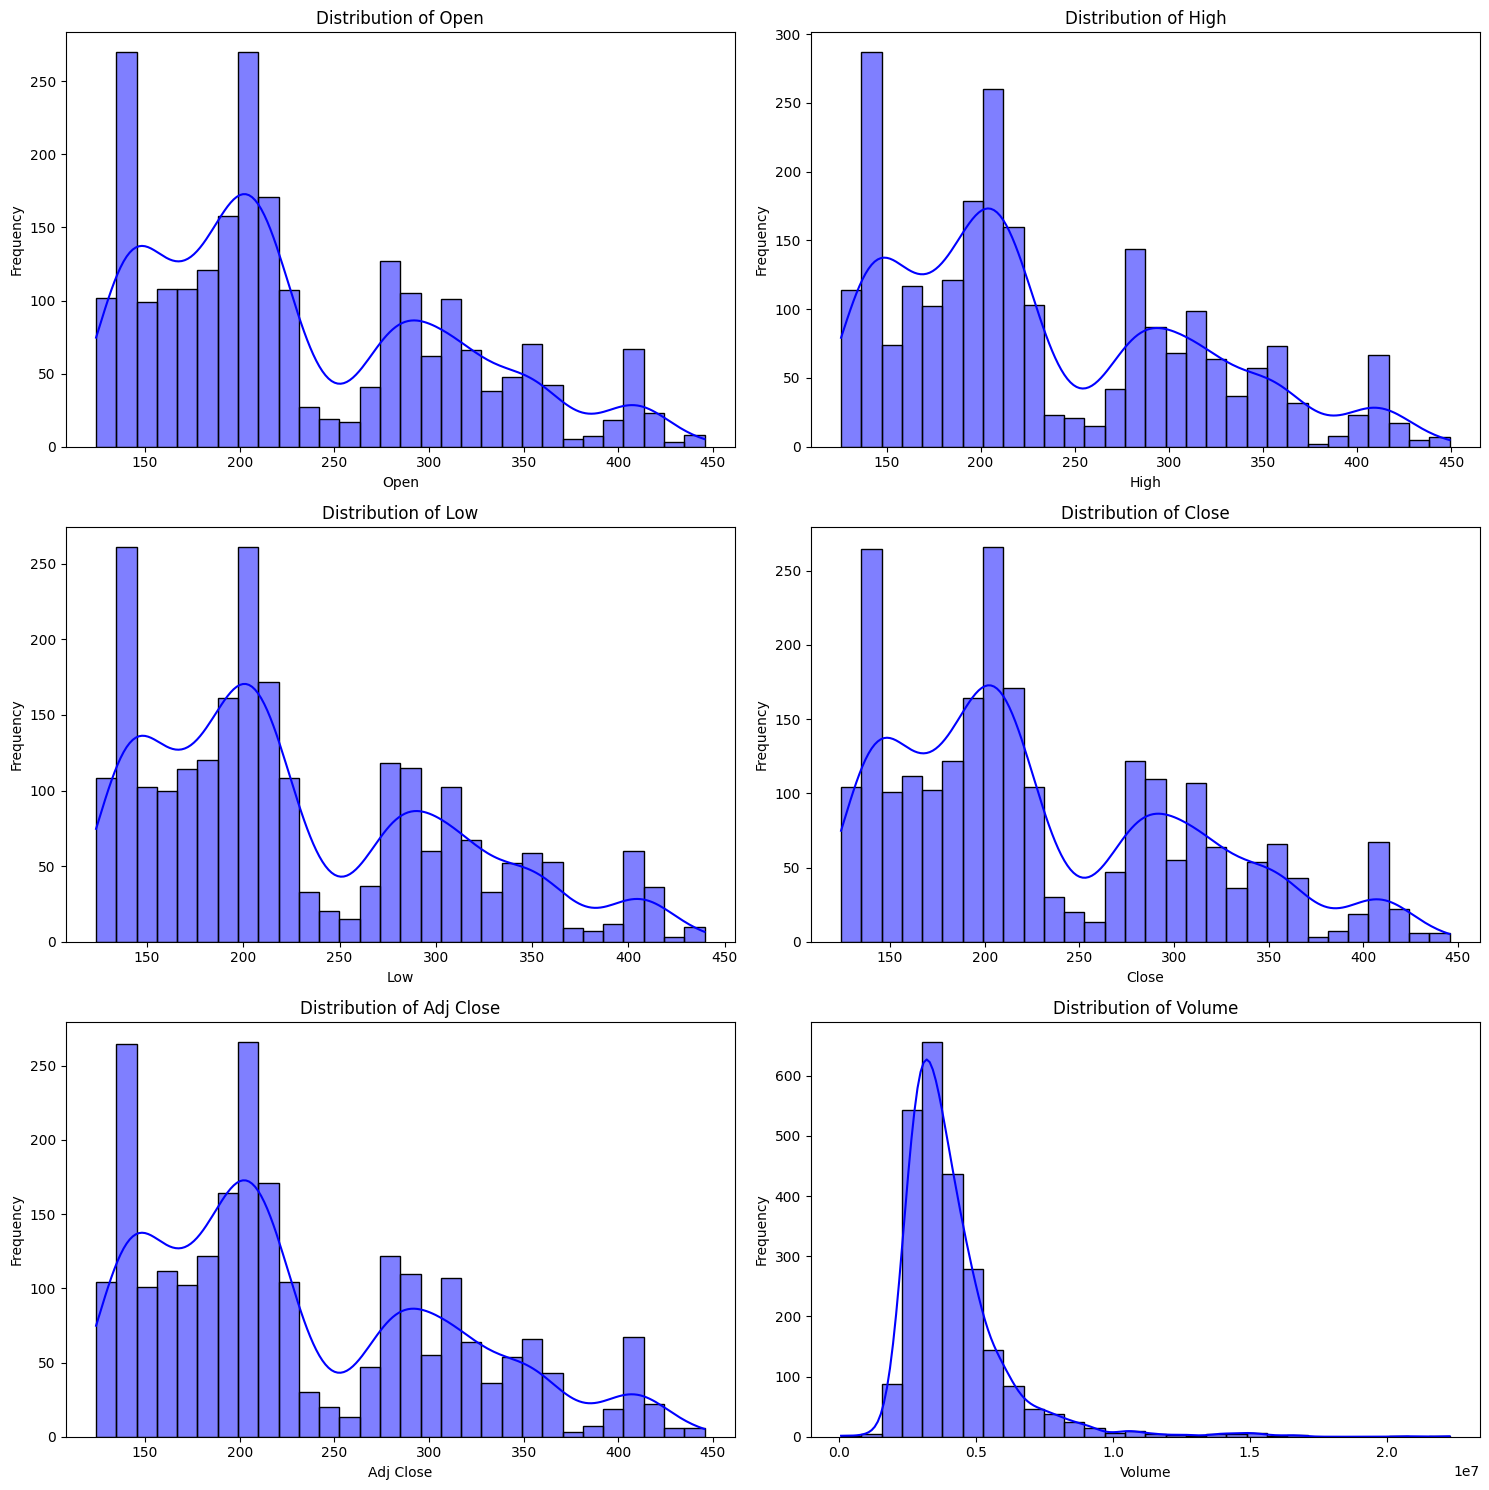

In [ ]:
variables = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()


for i, var in enumerate(variables):
    if var in df.columns:
        sns.histplot(df[var], bins=30, kde=True, ax=axes[i], color="blue")
        axes[i].set_title(f"Distribution of {var}")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

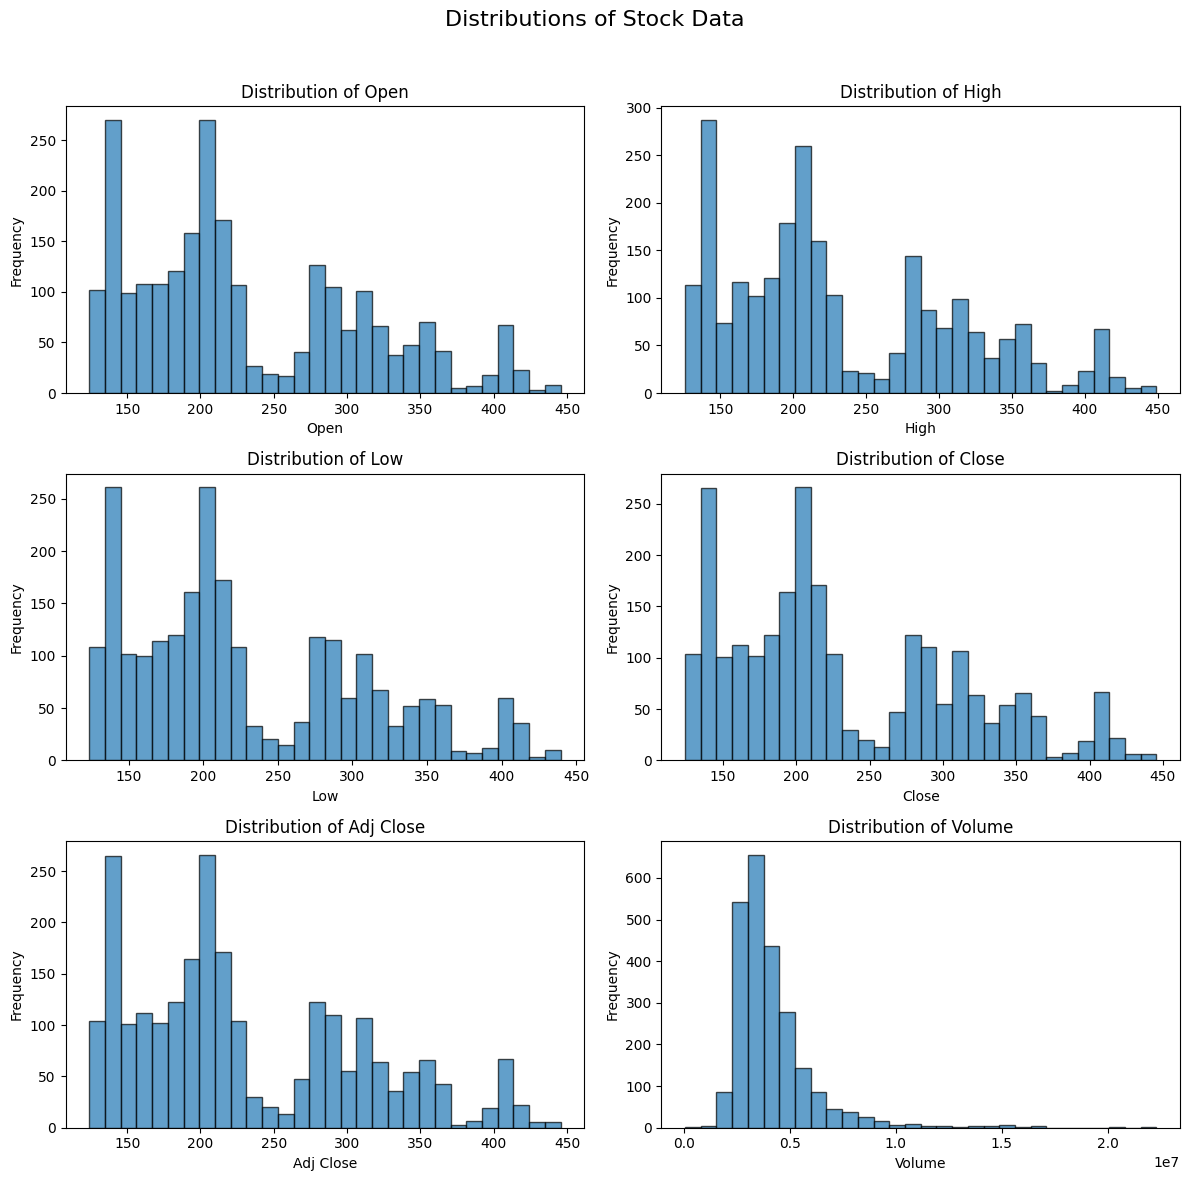

Open: Skewness = 0.6788 (Moderately positively skewed)
High: Skewness = 0.6737 (Moderately positively skewed)
Low: Skewness = 0.6839 (Moderately positively skewed)
Close: Skewness = 0.6796 (Moderately positively skewed)
Adj Close: Skewness = 0.6796 (Moderately positively skewed)
Volume: Skewness = 2.9857 (Highly positively skewed)


In [ ]:


fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Distributions of Stock Data", fontsize=16)


columns = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]


for ax, col in zip(axes.flatten(), columns):
    ax.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


skewness_values = {col: skew(df[col]) for col in columns}


for col, skew_val in skewness_values.items():
    if skew_val > 1:
        interpretation = "Highly positively skewed"
    elif 0.5 < skew_val <= 1:
        interpretation = "Moderately positively skewed"
    elif -0.5 <= skew_val <= 0.5:
        interpretation = "Approximately symmetric"
    elif -1 <= skew_val < -0.5:
        interpretation = "Moderately negatively skewed"
    else:
        interpretation = "Highly negatively skewed"
    print(f"{col}: Skewness = {skew_val:.4f} ({interpretation})")


In [ ]:
columns = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]


kurtosis_values = {col: kurtosis(df[col]) for col in columns}


for col, kurt_val in kurtosis_values.items():
    if kurt_val > 3:
        interpretation = "Leptokurtic (Heavy-tailed)"
    elif kurt_val == 3:
        interpretation = "Mesokurtic (Normal-tailed)"
    else:
        interpretation = "Platykurtic (Light-tailed)"
    print(f"{col}: Kurtosis = {kurt_val:.4f} ({interpretation})")


Open: Kurtosis = -0.5123 (Platykurtic (Light-tailed))
High: Kurtosis = -0.5216 (Platykurtic (Light-tailed))
Low: Kurtosis = -0.5025 (Platykurtic (Light-tailed))
Close: Kurtosis = -0.5110 (Platykurtic (Light-tailed))
Adj Close: Kurtosis = -0.5110 (Platykurtic (Light-tailed))
Volume: Kurtosis = 14.3599 (Leptokurtic (Heavy-tailed))


**Distribution of the target variable - High**

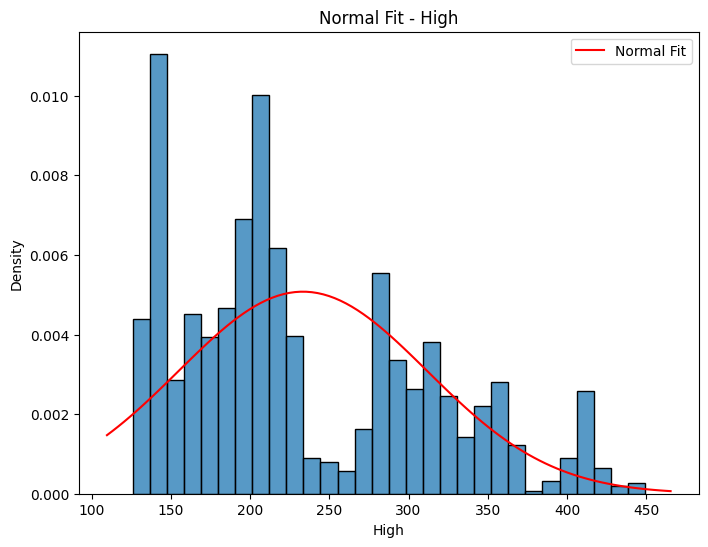

In [ ]:
High = df["High"]


plt.figure(figsize=(8, 6))
sns.histplot(High, bins=30, kde=False, stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, st.norm.pdf(x, High.mean(), High.std()), color="red", label="Normal Fit")  # Fit normal distribution

plt.title("Normal Fit - High")
plt.xlabel("High")
plt.ylabel("Density")
plt.legend()
plt.show()


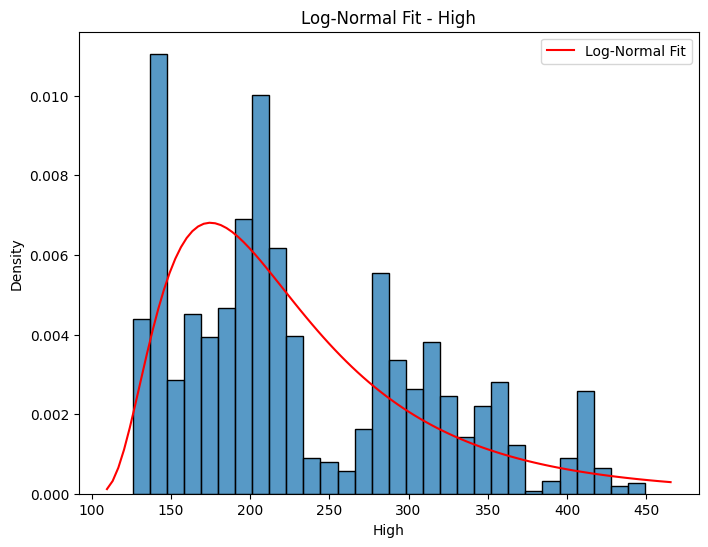

In [ ]:
High = df["High"]


plt.figure(figsize=(8, 6))
sns.histplot(High, bins=30, kde=False, stat="density") 


shape, loc, scale = st.lognorm.fit(High) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, st.lognorm.pdf(x, shape, loc, scale), color="red", label="Log-Normal Fit")

plt.title("Log-Normal Fit - High")
plt.xlabel("High")
plt.ylabel("Density")
plt.legend()
plt.show()


In [16]:
correlation = df.corr()
correlation["High"].sort_values(ascending = False)

High         1.000000
Open         0.999818
Close        0.999794
Adj Close    0.999794
Low          0.999730
Volume      -0.051287
Name: High, dtype: float64

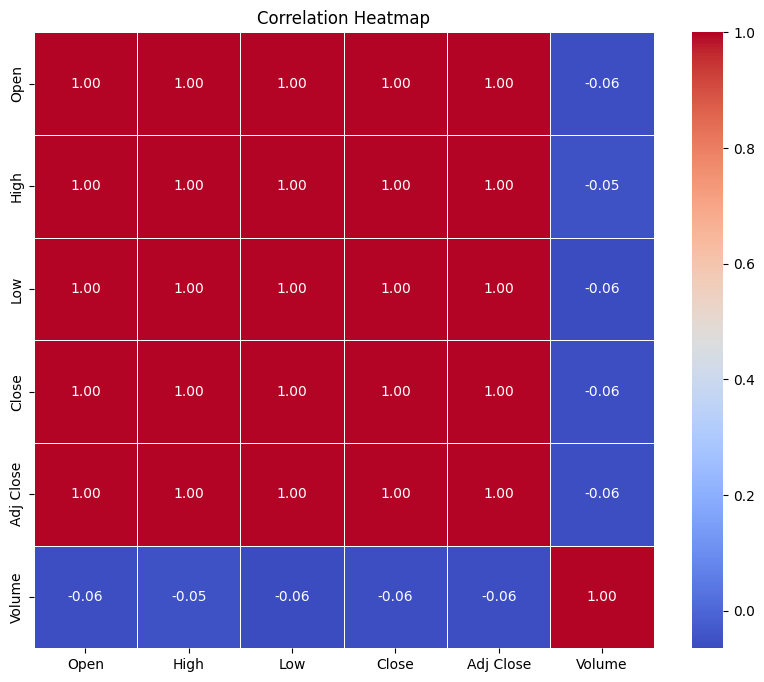

In [ ]:
corr_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**Pair plot**

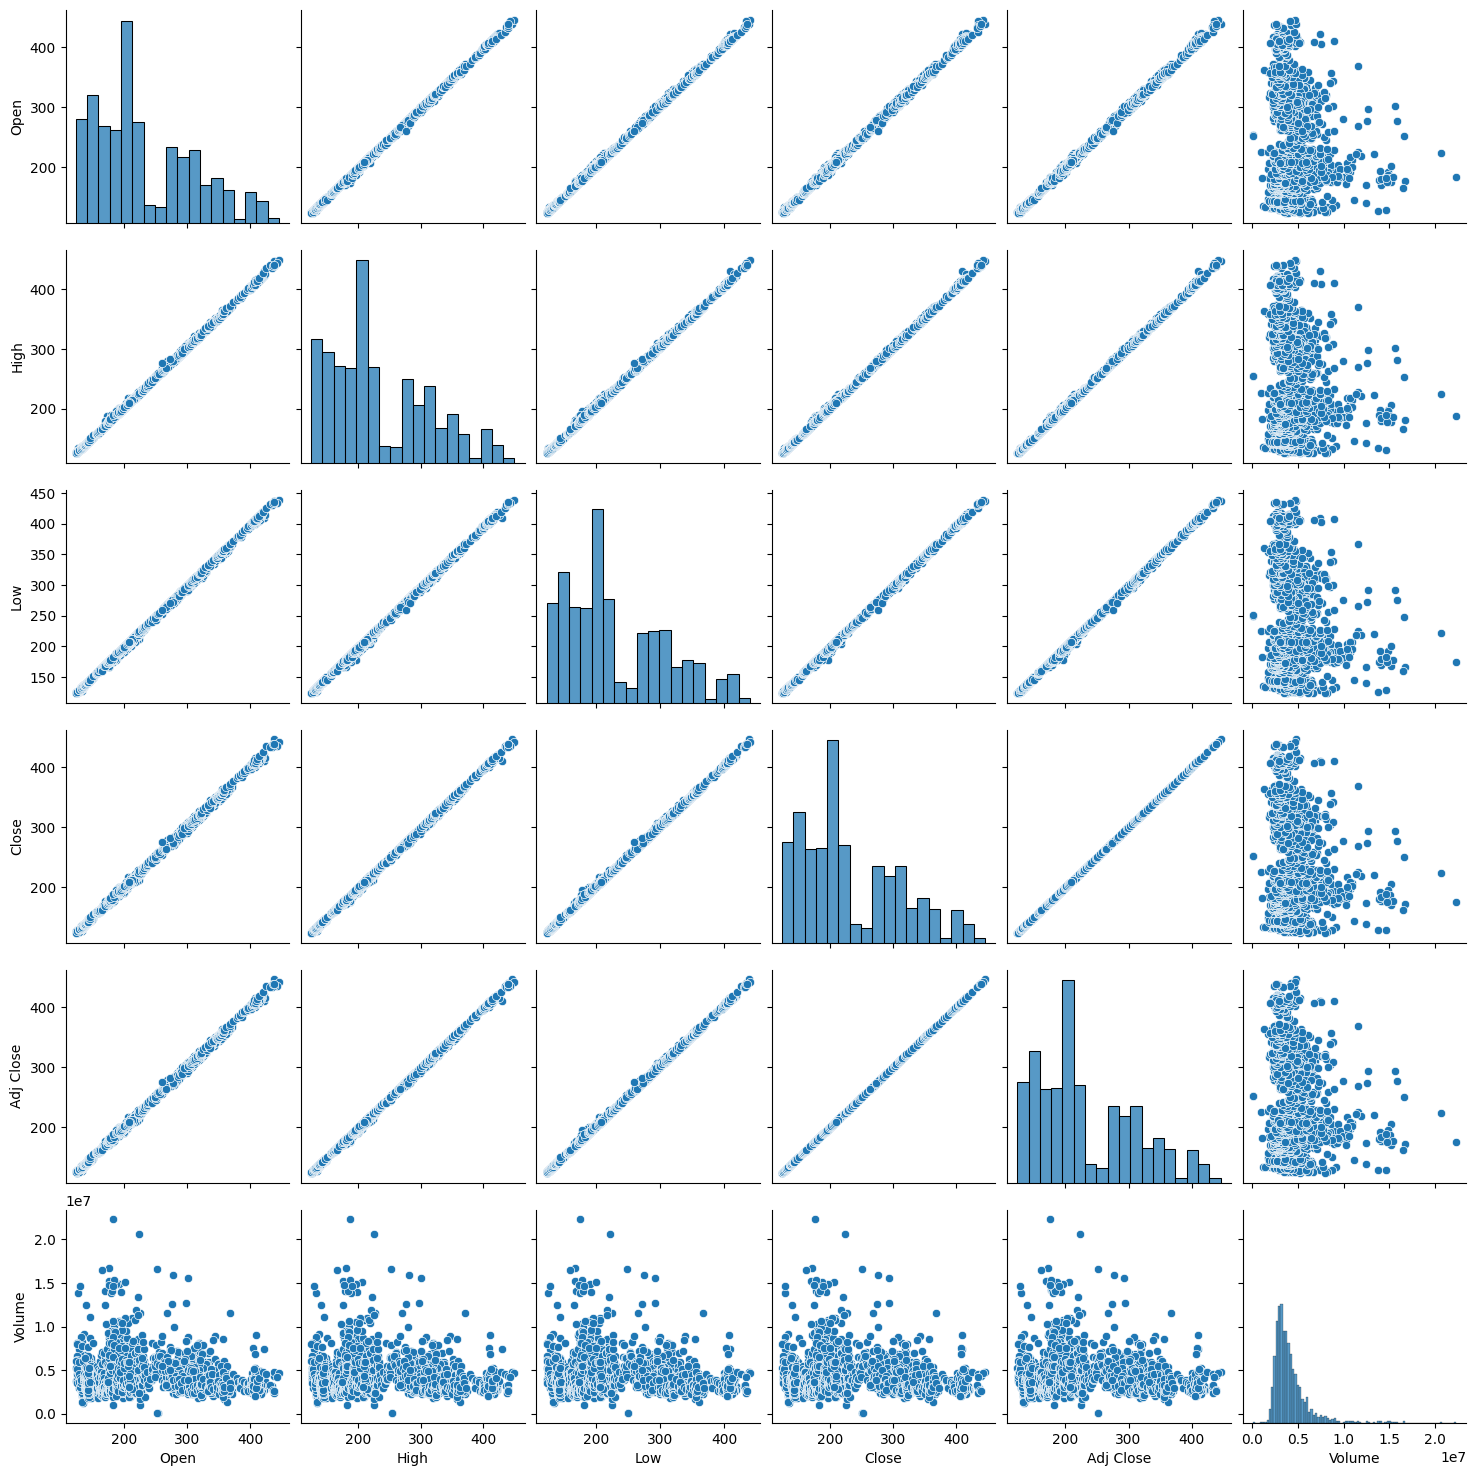

In [18]:
num_var = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

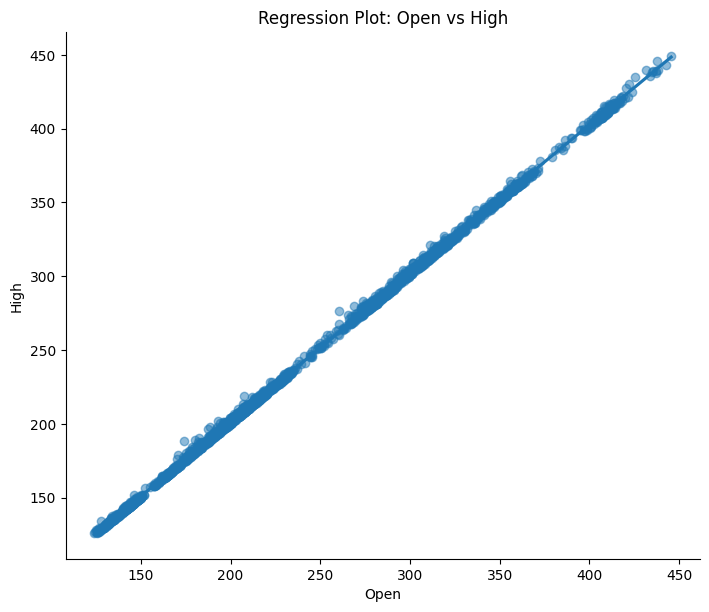

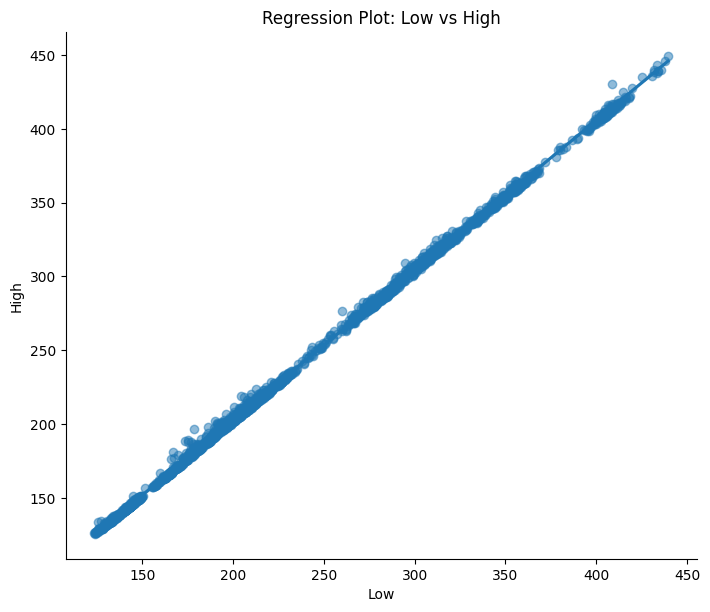

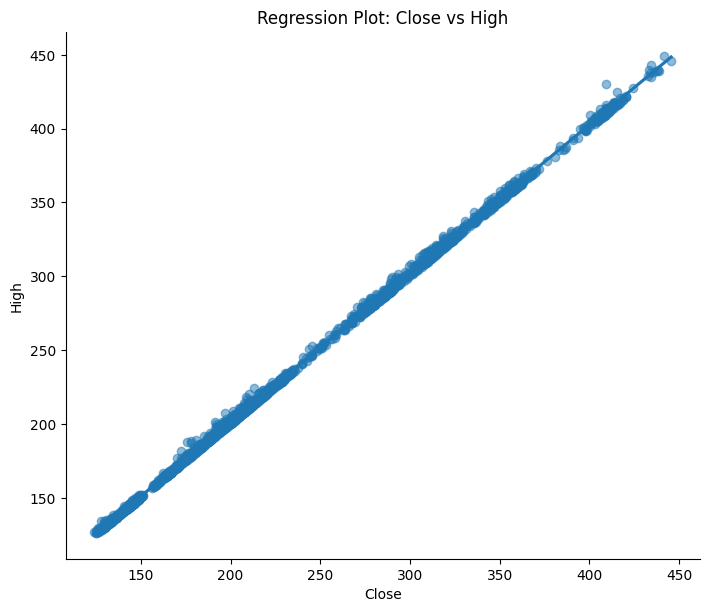

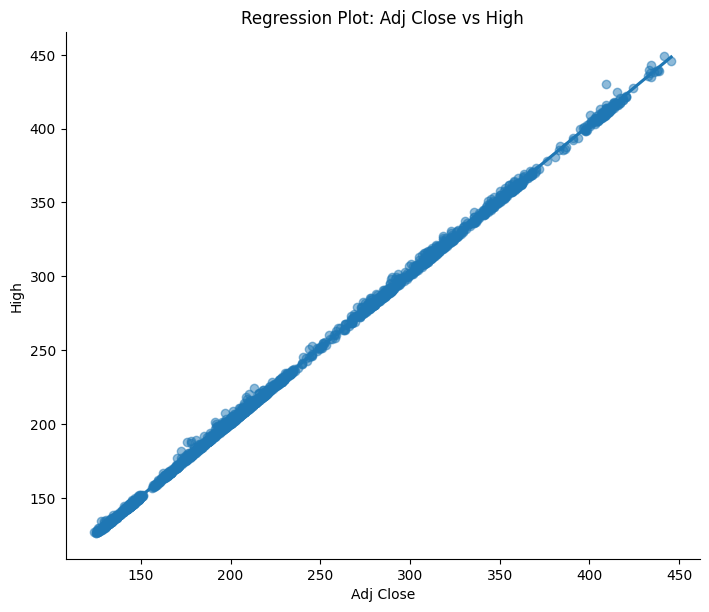

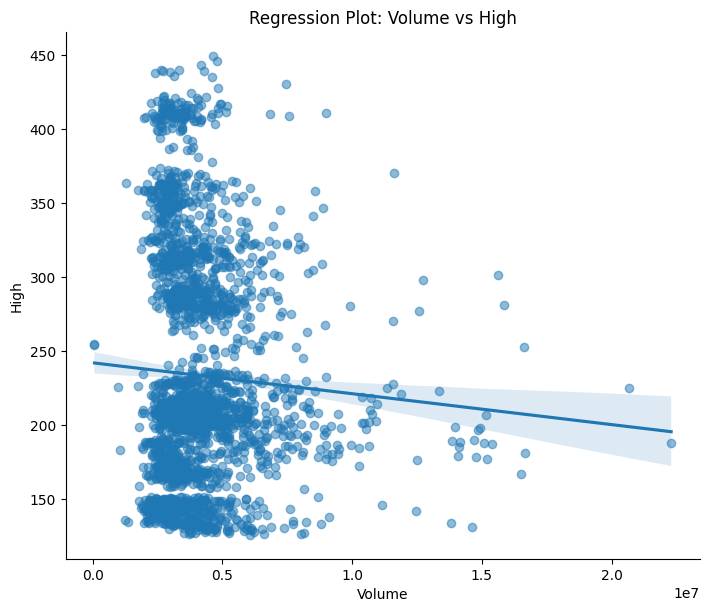

In [ ]:
features = ["Open", "Low", "Close", "Adj Close", "Volume"]


for feature in features:
    sns.lmplot(data=df, x=feature, y="High", height=6, aspect=1.2, scatter_kws={'alpha':0.5})
    plt.title(f"Regression Plot: {feature} vs High")
    plt.show()

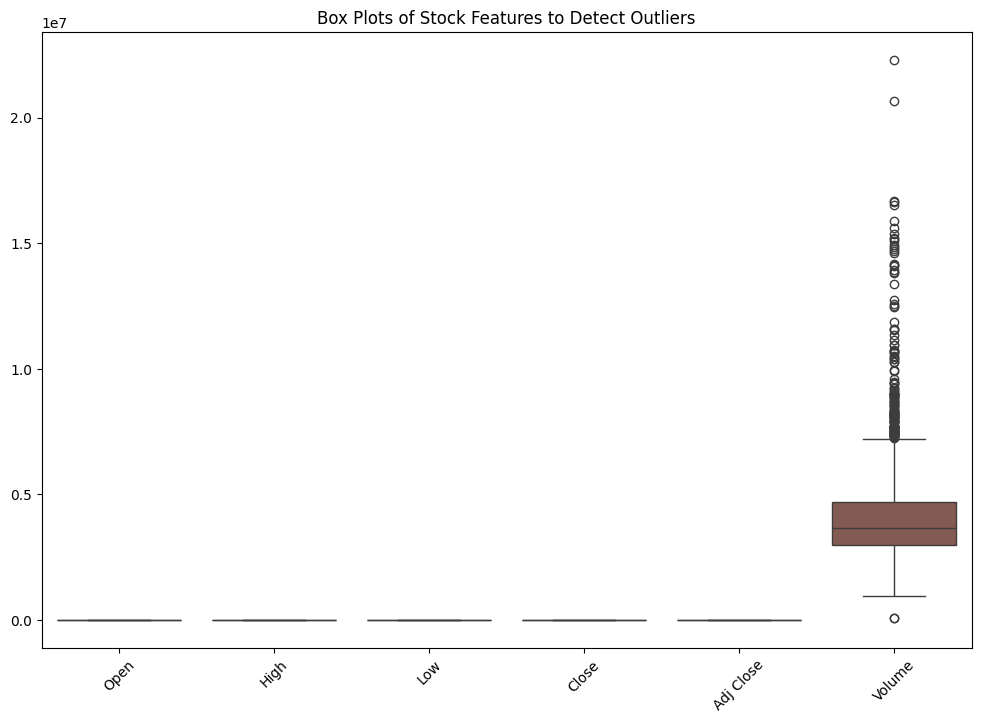

In [ ]:
features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]


plt.figure(figsize=(12, 8))
sns.boxplot(data=df[features])
plt.xticks(rotation=45)
plt.title("Box Plots of Stock Features to Detect Outliers")
plt.show()

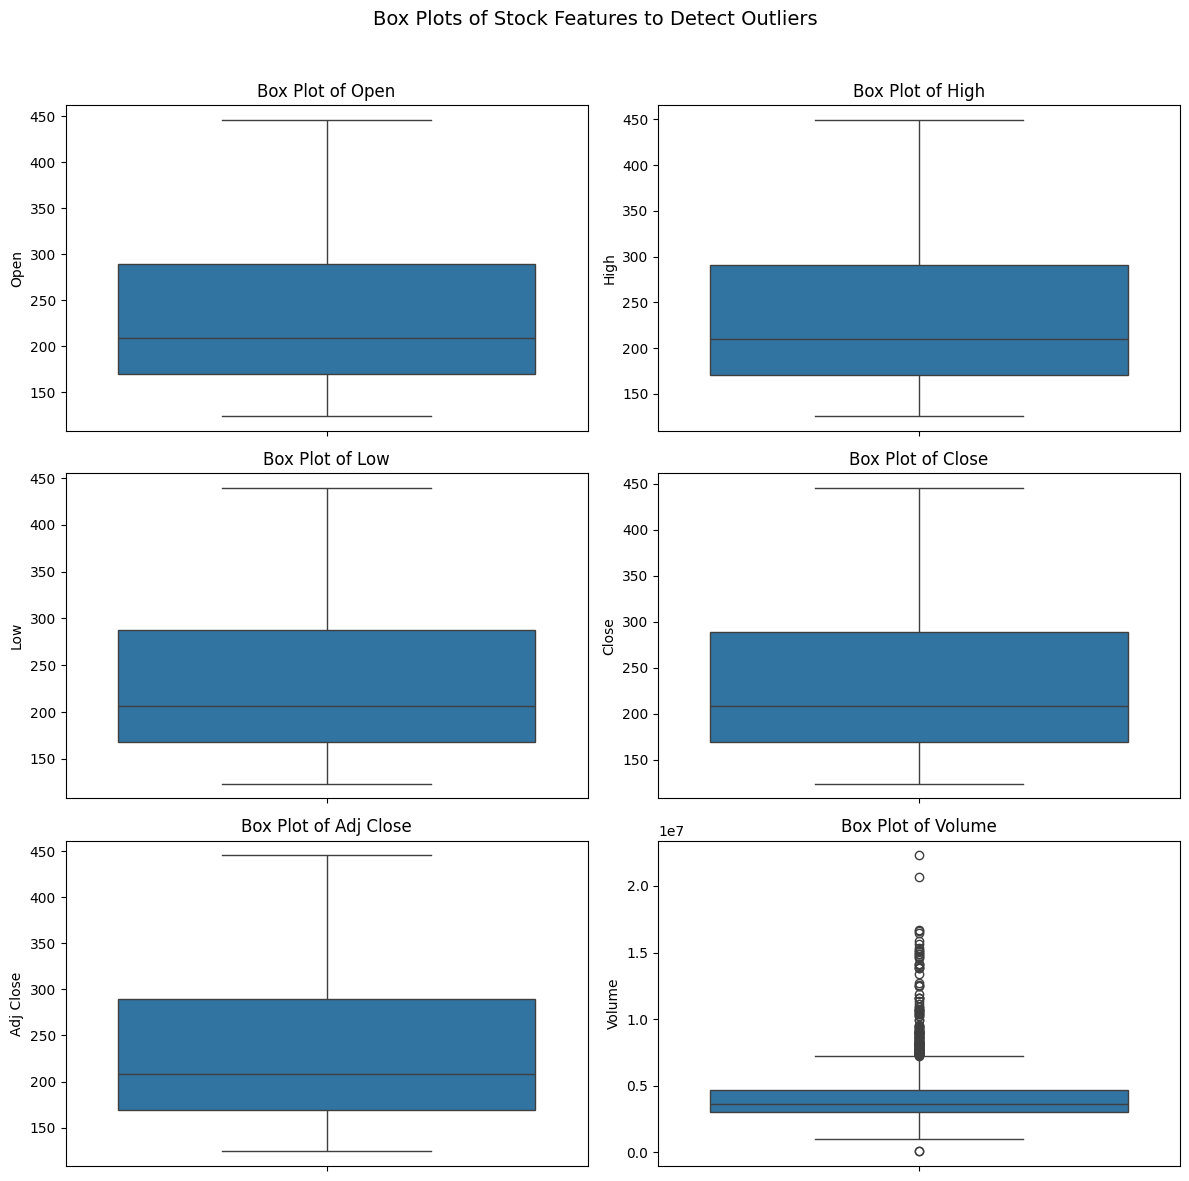

In [ ]:
features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]


fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Box Plots of Stock Features to Detect Outliers", fontsize=14)


for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(y=df[feature], ax=ax)
    ax.set_title(f"Box Plot of {feature}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

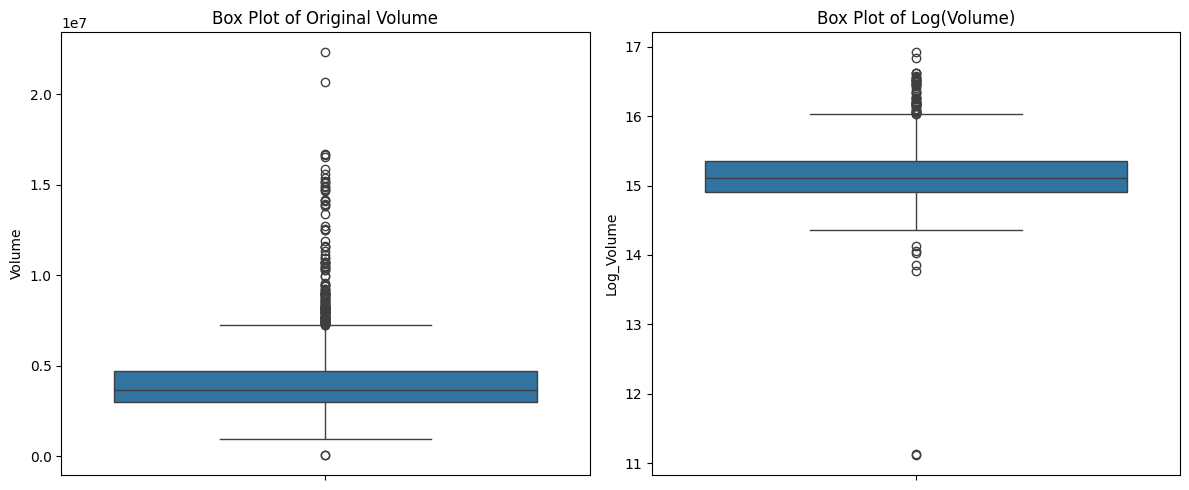

In [ ]:
df["Log_Volume"] = np.log1p(df["Volume"])  


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.boxplot(y=df["Volume"], ax=axes[0])
axes[0].set_title("Box Plot of Original Volume")


sns.boxplot(y=df["Log_Volume"], ax=axes[1])
axes[1].set_title("Box Plot of Log(Volume)")

plt.tight_layout()
plt.show()


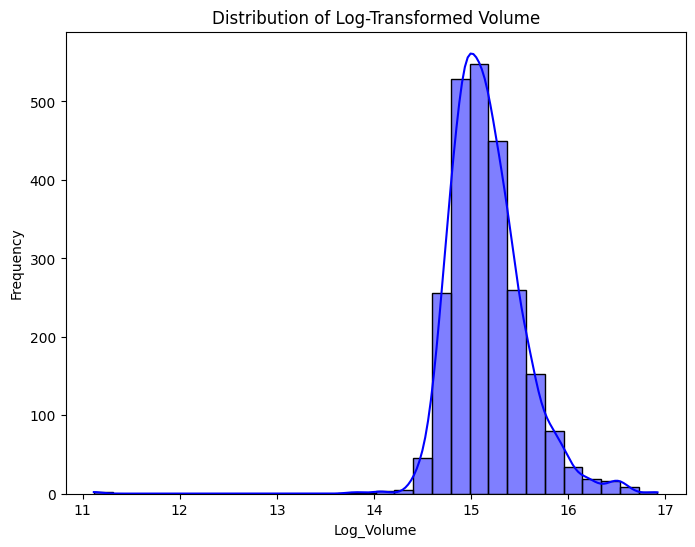

Skewness after log transformation: -0.1840


In [ ]:
df["Log_Volume"] = np.log1p(df["Volume"])  


plt.figure(figsize=(8, 6))
sns.histplot(df["Log_Volume"], bins=30, kde=True, color="blue")
plt.title("Distribution of Log-Transformed Volume")
plt.xlabel("Log_Volume")
plt.ylabel("Frequency")
plt.show()


skewness_value = skew(df["Log_Volume"])
print(f"Skewness after log transformation: {skewness_value:.4f}")

In [ ]:

df = pd.read_csv("berkshire_hathaway_data.csv")


df.drop(["Date"], axis=1, inplace=True)


X = df.drop("Close", axis=1)  
y = df["Close"]  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = LinearRegression()


cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {np.mean(cv_scores):.4f}")
print(f"Test Set Mean Squared Error: {mse:.4f}")
print(f"Test Set R² Score: {r2:.4f}")


Cross-validation R² scores: [1. 1. 1. 1. 1.]
Mean CV R² score: 1.0000
Test Set Mean Squared Error: 0.0000
Test Set R² Score: 1.0000


Cross-validation R² scores: [0.99502386 0.99837863 0.99340353 0.9987327  0.99902684]
Mean CV R² score: 0.9969
Test Set Mean Squared Error: 0.8571
Test Set R² Score: 0.9998
Mean Absolute Error (MAE): 0.6650


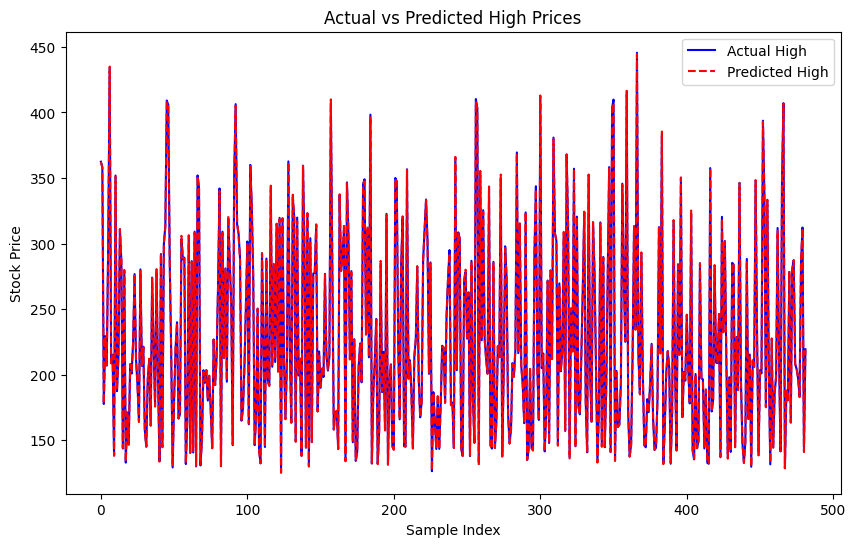

In [ ]:
df = pd.read_csv("berkshire_hathaway_data.csv")


df.drop(["Date"], axis=1, inplace=True)


X = df.drop(["Close", "Adj Close"], axis=1)  
y = df["Close"] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)


model = LinearRegression()


cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {np.mean(cv_scores):.4f}")
print(f"Test Set Mean Squared Error: {mse:.4f}")
print(f"Test Set R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual High', color='blue')
plt.plot(y_pred, label='Predicted High', color='red', linestyle='dashed')
plt.title("Actual vs Predicted High Prices")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [ ]:
)
r2 = r2_score(y_test, y_pred)


print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {np.mean(cv_scores):.4f}")
print(f"Test Set Mean Squared Error: {mse:.4f}")
print(f"Test Set R² Score: {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual High', color='blue')
plt.plot(y_pred, label='Predicted High', color='red', linestyle='dashed')
plt.title("Actual vs Predicted High Prices")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

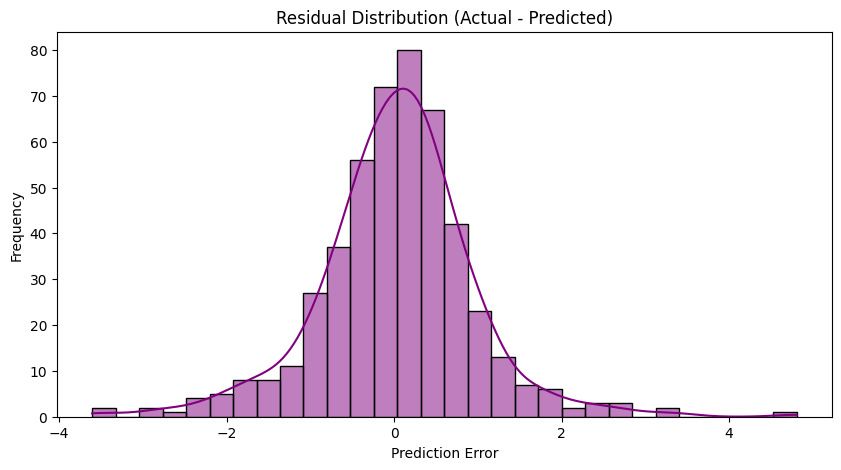

In [32]:
residuals = y_test.values - y_pred

plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residual Distribution (Actual - Predicted)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()
